In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, median_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import random

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

file_path = 'selected_features_data_top_15.csv'
data = pd.read_csv(file_path)


target_column = 'close'
mandatory_columns = ['company', 'date']
features = ['open', 'currentAccountsPayable', 'researchAndDevelopment', 'volume',
            'propertyPlantEquipment', 'otherNonCurrentAssets', 'nonInterestIncome',
            'dividendPayout', 'depreciationDepletionAndAmortization', 'ebitda',
            'comprehensiveIncomeNetOfTax', 'depreciationAndAmortization', 'longTermDebtNoncurrent',
            'totalRevenue', 'otherNonOperatingIncome']

X = data[features]
y = data[target_column]


scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])


model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_train_pred_original = scaler_y.inverse_transform(y_train_pred).flatten()
y_test_pred_original = scaler_y.inverse_transform(y_test_pred).flatten()
y_train_original = scaler_y.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()


train_rmse = np.sqrt(mean_squared_error(y_train_original, y_train_pred_original))
test_rmse = np.sqrt(mean_squared_error(y_test_original, y_test_pred_original))
train_mae = mean_absolute_error(y_train_original, y_train_pred_original)
test_mae = mean_absolute_error(y_test_original, y_test_pred_original)
train_r2 = r2_score(y_train_original, y_train_pred_original)
test_r2 = r2_score(y_test_original, y_test_pred_original)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

train_mape = mean_absolute_percentage_error(y_train_original, y_train_pred_original)
test_mape = mean_absolute_percentage_error(y_test_original, y_test_pred_original)
train_explained_variance = explained_variance_score(y_train_original, y_train_pred_original)
test_explained_variance = explained_variance_score(y_test_original, y_test_pred_original)
train_median_ae = median_absolute_error(y_train_original, y_train_pred_original)
test_median_ae = median_absolute_error(y_test_original, y_test_pred_original)

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')
print(f'Train MAPE: {train_mape}%')
print(f'Test MAPE: {test_mape}%')
print(f'Train Explained Variance: {train_explained_variance}')
print(f'Test Explained Variance: {test_explained_variance}')
print(f'Train Median Absolute Error: {train_median_ae}')
print(f'Test Median Absolute Error: {test_median_ae}')



Epoch 1/100
115/115 [==============================] - 2s 8ms/step - loss: 0.6411 - mae: 0.2945 - val_loss: 0.1355 - val_mae: 0.1384
Epoch 2/100
115/115 [==============================] - 1s 6ms/step - loss: 0.0734 - mae: 0.1097 - val_loss: 0.0431 - val_mae: 0.1088
Epoch 3/100
115/115 [==============================] - 1s 5ms/step - loss: 0.0411 - mae: 0.0881 - val_loss: 0.0311 - val_mae: 0.0850
Epoch 4/100
115/115 [==============================] - 1s 5ms/step - loss: 0.0377 - mae: 0.0846 - val_loss: 0.0203 - val_mae: 0.0763
Epoch 5/100
115/115 [==============================] - 1s 10ms/step - loss: 0.0310 - mae: 0.0757 - val_loss: 0.0182 - val_mae: 0.0707
Epoch 6/100
115/115 [==============================] - 1s 11ms/step - loss: 0.0301 - mae: 0.0716 - val_loss: 0.0274 - val_mae: 0.0832
Epoch 7/100
115/115 [==============================] - 1s 10ms/step - loss: 0.0280 - mae: 0.0718 - val_loss: 0.0294 - val_mae: 0.0845
Epoch 8/100
115/115 [==============================] - 1s 10ms/ste

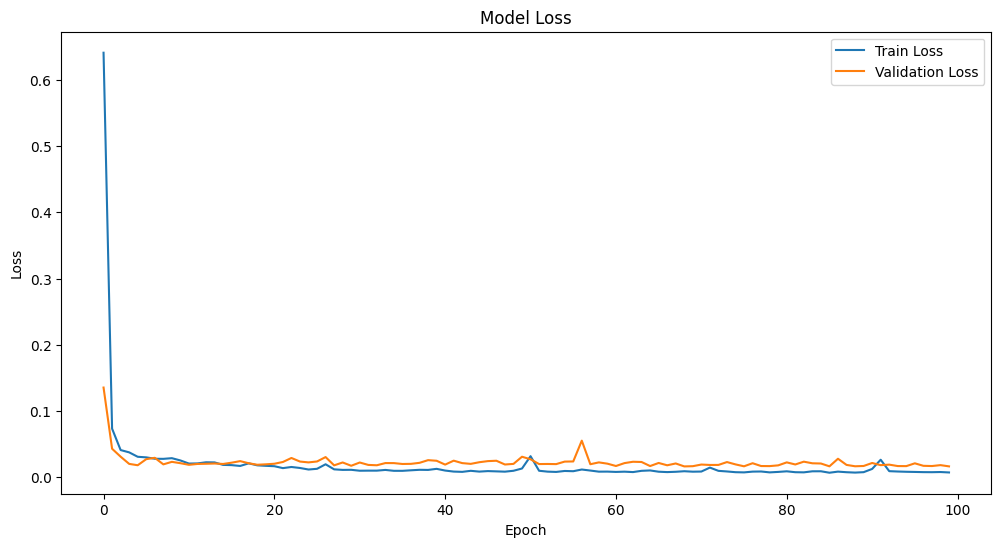

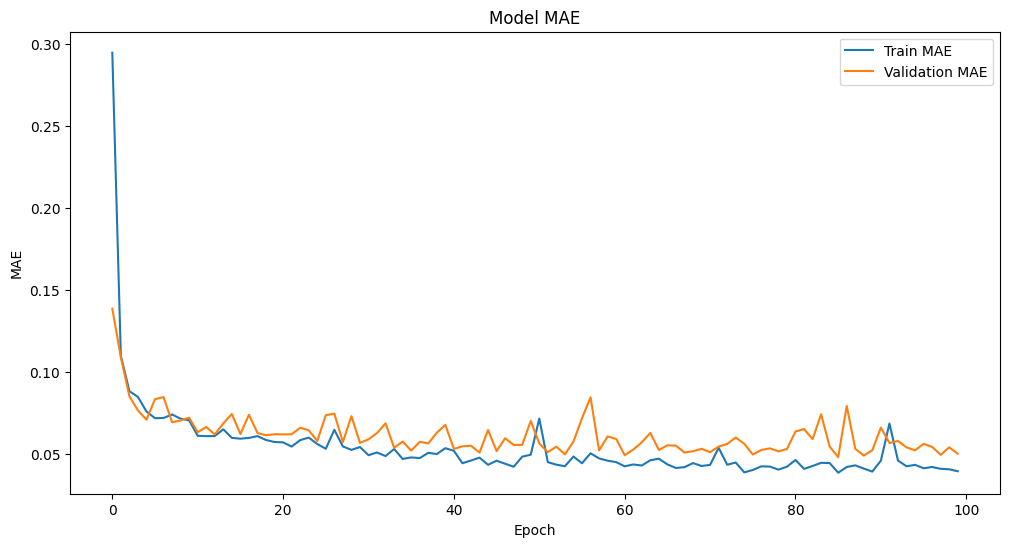

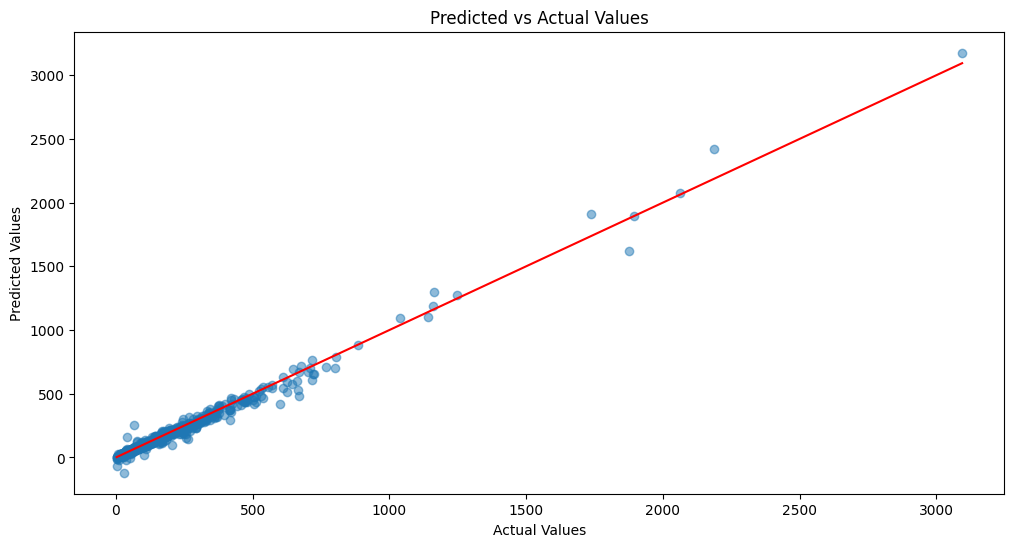

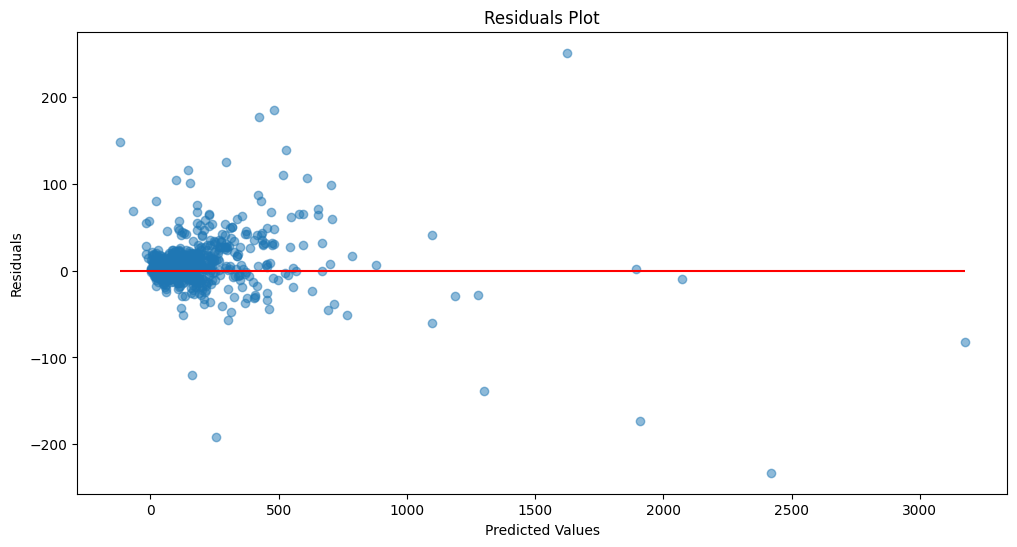

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Plot training & validation MAE values
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.show()

# Plot predicted vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test_original, y_test_pred_original, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Calculate residuals
residuals = y_test_original - y_test_pred_original

# Plot residuals
plt.figure(figsize=(12, 6))
plt.scatter(y_test_pred_original, residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(y_test_pred_original), xmax=max(y_test_pred_original), colors='r')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
